In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import interpolatespectra
from scipy import interpolate

## If your interpolated spectra has unneccessary additions to its calibration spectra; take note because you need to still identify these false negatives. Later, you will need to remove the false negatives from the dataset. 

### Make sure to look at peakidentify and chemical reactions to note unnecessary additions to your calibration spectra before continuing to the machine learning

In [2]:
dataprep.new_hdf5('Regression_supervised_calibration_dataset')
dataprep.add_calibration('Regression_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
dataprep.add_calibration('Regression_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
dataprep.add_calibration('Regression_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
dataprep.add_calibration('Regression_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
dataprep.add_calibration('Regression_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
dataprep.add_calibration('Regression_supervised_calibration_dataset.hdf5','../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx',label='FormicAcid')


Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model.
     Results saved to Regression_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to Regression_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to Regression_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model.
     Results saved to Regression_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model.
     Results saved to Regression_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx fit with compound pseudo-Voigt model.
     Results saved to

In [3]:
dataprep.add_calibration('Regression_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
dataprep.add_calibration('Regression_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'propane')
dataprep.add_calibration('Regression_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'ethane')
dataprep.add_calibration('Regression_supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'acetaldehyde')

Data from ../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to Regression_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Propane_test.xlsx fit with compound pseudo-Voigt model.
     Results saved to Regression_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Ethane_test.xlsx fit with compound pseudo-Voigt model.
     Results saved to Regression_supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx fit with compound pseudo-Voigt model.
     Results saved to Regression_supervised_calibration_dataset.hdf5.


In [4]:
dataprep.view_hdf5('Regression_supervised_calibration_dataset.hdf5')

**** Regression_supervised_calibration_dataset.hdf5 ****
FormicAcid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    counts
|    residuals
|    wavenumber
acetaldehyde
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    counts
|    residuals
|    wavenumber
carbon dioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
carbon monoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
methane
|    Peak_01
|    counts
|    residuals
|    wavenumber
propane
|    Peak_01
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
water
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenu

# Interpolated calibration dataset

In [5]:
# dataprep.new_hdf5('supervised_calibration_interp')

In [6]:
dataprep.view_hdf5('../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5')

**** ../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5 ****
interp_FormicAcid
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    1
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    10
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|   

|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    31
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    Peak_24
|    |    counts
|    |    residuals
|    |    wavenumber
|    32
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|   

|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    54
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    55
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|   

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    20
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    21
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|   

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    46
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    47
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|   

|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    13
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    14
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber


|    |    counts
|    |    residuals
|    |    wavenumber
|    30
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    counts
|    |    residuals
|    |    wavenumber
|    31
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    32
|    |    Peak_01
|    |    

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    6
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    7
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |

|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    3
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    30
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    31
|    |    P

|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    52
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    53
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|   

|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    23
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    24
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    25
|    |    Peak_01
|    |    

|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    44
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    45
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    46
|    |    Peak_01
|    |    Peak_02
|    |    

|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    counts
|    |    residuals
|    |    wavenumber
|    22
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    23
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    24
|    |    

|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    42
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    43
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    44
|    |    

|    |    wavenumber
|    9
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
interp_methane
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    1
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07

|    |    residuals
|    |    wavenumber
|    35
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    36
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
|    37
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |   

|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    59
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    6
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    

|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    Peak_23
|    |    counts
|    |    residuals
|    |    wavenumber
|    24
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    25
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|   

|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    43
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    44
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    45
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    

|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    14
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    counts
|    |    residuals
|    |    wavenumber
|    15
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|   

|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    43
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    Peak_22
|    |    counts
|    |    residuals
|    |    wavenumber
|    44
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    counts
|    |    residuals
|    |    wavenumber
|    45
|    |    Peak_01
|    |    

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    13
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    14
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|   

|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    Peak_20
|    |    Peak_21
|    |    counts
|    |    residuals
|    |    wavenumber
|    37
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    counts
|    |    residuals
|    |    wavenumber
|    38
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|   

In [7]:
hdf5_interpfilename = '../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5'
# first a function that will return a normalized interpolated spectra
# target_compound = 'water'
# compound = 'water'
hdf5_calfilename = 'Regression_supervised_calibration_dataset.hdf5'

In [8]:
# frames = interpspectra.interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count)


In [9]:
# frames

In [10]:
key_list = interpolatespectra.keyfinder(hdf5_interpfilename)
print(key_list)

['interp_FormicAcid/0', 'interp_FormicAcid/1', 'interp_FormicAcid/10', 'interp_FormicAcid/11', 'interp_FormicAcid/12', 'interp_FormicAcid/13', 'interp_FormicAcid/14', 'interp_FormicAcid/15', 'interp_FormicAcid/16', 'interp_FormicAcid/17', 'interp_FormicAcid/18', 'interp_FormicAcid/19', 'interp_FormicAcid/2', 'interp_FormicAcid/20', 'interp_FormicAcid/21', 'interp_FormicAcid/22', 'interp_FormicAcid/23', 'interp_FormicAcid/24', 'interp_FormicAcid/25', 'interp_FormicAcid/26', 'interp_FormicAcid/27', 'interp_FormicAcid/28', 'interp_FormicAcid/29', 'interp_FormicAcid/3', 'interp_FormicAcid/30', 'interp_FormicAcid/31', 'interp_FormicAcid/32', 'interp_FormicAcid/33', 'interp_FormicAcid/34', 'interp_FormicAcid/35', 'interp_FormicAcid/36', 'interp_FormicAcid/37', 'interp_FormicAcid/38', 'interp_FormicAcid/39', 'interp_FormicAcid/4', 'interp_FormicAcid/40', 'interp_FormicAcid/41', 'interp_FormicAcid/42', 'interp_FormicAcid/43', 'interp_FormicAcid/44', 'interp_FormicAcid/45', 'interp_FormicAcid/4

In [11]:
# df = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
#       keys=None, levels=None, names=None, verify_integrity=False,
#       copy=True,sort=True)
# df

# SAVE your hdf5 file before continuing and MAKE COPIES

In [12]:
hdf5_calfilename = 'Regression_supervised_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = '../ramandecompy/tests/test_files/supervised_calibration_interp-Copy2.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane a

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 87.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 50.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 100.0, 'water': 100.0}
Function did not receive normal peak.
            The function continued to look for an adjusted peak.


KeyError: "Unable to open object (object 'Peak_20*' doesn't exist)"

In [13]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [14]:
cal = pd.DataFrame()

In [15]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
cal['fraction']= result[:][0]
cal['sigma']= result[:][1]
cal['center']= result[:][2]
cal['amplitude']= result[:][3]
cal['fwhm']= result[:][4]
cal['height']= result[:][5]
cal['auc']= result[:][6]
cal['labelencoded']=le.fit_transform(result[:][7])
cal['labels']= result[:][7]


In [16]:
# row = next(cal.iterrows())
# row

In [17]:
cal

,fraction,sigma,center,amplitude,fwhm,height,auc,labelencoded,labels
0,0.718327,4.38034,355,3.24152,8.76068,0.267115,3.2092,7,['hydrogen']
1,0.559497,4.46586,587,8.22711,8.93173,0.709266,8.20519,7,['hydrogen']
2,0.999991,4.09516,815,1.74873,8.19031,0.135927,1.74376,7,['hydrogen']
3,0.161422,8.73498,860,14.3263,17.47,0.730304,14.3131,3,['acetaldehyde']
4,0.866009,4.56467,867,4.13449,9.12933,0.306687,4.12386,2,"['acetaldehyde', 'propane']"
5,0.960679,17.0161,929,7.98291,34.0322,0.152125,7.9038,3,['acetaldehyde']
6,0.56628,3.64838,993,2.54471,7.29676,0.267822,2.54172,6,['ethane']
7,0.493458,4.15201,1035,0.997185,8.30402,0.094868,0.996063,7,['hydrogen']
8,0.240626,27.4578,1098,12.098,54.9156,0.190907,12.0562,3,['acetaldehyde']
9,1,3.57851,1280,5.30806,7.15703,0.472154,5.29913,4,['carbon dioxide']


In [18]:
calformic = cal.where(cal.labelencoded == 0).dropna()

In [19]:
calformic

,fraction,sigma,center,amplitude,fwhm,height,auc,labelencoded,labels
11,0.33018,49.373,1405,29.4553,98.746,0.250404,29.2404,0.0,"['FormicAcid', 'acetaldehyde']"
14,0.917099,9.36614,1715,10.2305,18.7323,0.361396,10.1932,0.0,"['FormicAcid', 'acetaldehyde']"
12,1,17.1294,1400,26.6998,34.2587,0.496156,26.4947,0.0,"['FormicAcid', 'acetaldehyde']"
13,0.615985,27.706,1716,61.5176,55.412,0.835866,61.0724,0.0,"['FormicAcid', 'acetaldehyde']"
14,1,26.6201,1401,45.5737,53.2402,0.544947,45.0297,0.0,"['FormicAcid', 'acetaldehyde']"
17,0.547501,22.0575,1715,50.3982,44.115,0.883832,50.1401,0.0,"['FormicAcid', 'acetaldehyde']"
14,0.391077,48.9899,1405,28.8441,97.9798,0.241696,28.5967,0.0,"['FormicAcid', 'acetaldehyde']"
17,0.942611,9.37733,1715,9.88335,18.7547,0.344645,9.8463,0.0,"['FormicAcid', 'acetaldehyde']"
13,1,32.07,1401,65.8519,64.1399,0.653612,64.9049,0.0,"['FormicAcid', 'acetaldehyde']"
15,0.996169,21.828,1716,79.7212,43.6559,1.16467,78.9861,0.0,"['FormicAcid', 'acetaldehyde']"


# Experimental dataset

In [20]:
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

**** dataimport_ML_df-Copy1.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    15s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    5s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
|    75s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |  

In [21]:
key_list = interpolatespectra.keyfinder('dataimport_ML_df-Copy1.hdf5')
len(key_list)

50

In [22]:
hdf5_calfilename = 'Regression_supervised_calibration_dataset.hdf5' 
hdf5_expfilename = 'dataimport_ML_df-Copy1.hdf5'
frames = []
for _, key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we f

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

{'FormicAcid': 0.0, 'acetaldehyde': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 0.0, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.65477

{'FormicAcid': 66.66666666666666, 'acetaldehyde': 12.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

{'FormicAcid': 0.0, 'acetaldehyde': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 0.0, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.333313313313

{'FormicAcid': 0.0, 'acetaldehyde': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 0.0, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.007347347

In [23]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=key_list, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [24]:
dat = pd.DataFrame()

In [25]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]


In [26]:
dat

fraction    sigma  center amplitude     fwhm   height  \
300C/25s 0   2.66632e-06  9.47784  314.77   251.853  18.9557  12.4817   
         1      0.506813   4.0129  378.71   1034.01   8.0258   101.26   
         2      0.636782  3.84759  418.14   7306.16  7.69519  708.864   
         3   2.55231e-05  2.69962  448.67   193.734  5.39924  33.7084   
         4      0.188666  4.21062  578.11   1090.47  8.42124   114.25   
         5   1.38778e-15  20.4979  711.51   6837.15  40.9957  156.677   
         6   6.88713e-07  7.19462  751.21   3533.44  14.3892  230.689   
         7             0  18.0052  1055.9   1438.24  36.0103  37.5207   
         8      0.841161  29.1589  1217.6   20781.3  58.3177  243.997   
         9             1  15.8466  1400.1   15275.1  31.6932  306.831   
         10  1.05175e-05  47.9173  1649.3   35138.2  95.8346  344.448   
         11     0.179058   26.217  1714.9   25828.1   52.434  436.042   
         12            1  3.77176  2137.9   285.944  7.54351  24.1317   
         13     0.489606  3.60812  2328.9   255.955  7.21624  28.0624   
         14  1.60982e-15  21.9786  2948.2   3553.09  43.9572  75.9353   
         15     0.553011  79.8096  3185.1   53203.1  159.619  257.309   
300C/35s 0      0.493198  3.84136  378.71    985.18  7.68271  101.316   
         1      0.642997  3.81059  418.14   7232.34  7.62118   706.73   
         2   1.07692e-14  2.61594  450.84   150.018  5.23189  26.9372   
         3      0.490083  4.12695  578.11   1229.31   8.2539  117.814   
         4      0.966028  4.26157  614.36     205.6  8.52315  15.6051   
         5   1.11022e-15  20.5743  711.51   7441.88  41.1487    169.9   
         6   5.93652e-09  7.11561  751.21   3457.79  14.2312  228.257   
         7             0  18.2118  1055.9   1501.97  36.4236  38.7388   
         8      0.799162  29.0338  1217.6   21598.4  58.0676  259.413   
         9             1  15.7745  1400.1   16283.5  31.5491   328.58   
         10   4.7038e-08  52.5427  1651.1   37279.7  105.085  333.271   
         11     0.177272  26.9016  1713.2     26193  53.8033  431.212   
         12     0.982646  4.00883  2137.9   532.343  8.01767  42.6181   
         13  2.80814e-11  3.97073  2330.3   209.439  7.94147  24.7756   
...                  ...      ...     ...       ...      ...      ...   
430C/6s  9             1  7.69256  1385.3   23660.9  15.3851  979.063   
         10  1.11022e-15  50.4553  1638.9   24675.3  100.911  229.717   
         11     0.738487  4.16778  2140.9   1014.36  8.33557  87.1077   
         12     0.520028  93.2303  3187.9   51105.6  186.461  214.322   
430C/7s  0      0.541635  4.39474  354.52    7253.4  8.78947  639.906   
         1      0.292955  4.04618  378.71   570.694  8.09236  59.9954   
         2      0.619249  3.88885  418.14   7308.87   7.7777  706.593   
         3   0.000684137  2.73452  448.67    234.62  5.46903  40.2928   
         4       0.63861  4.54011  586.66   20832.2  9.08021  1711.63   
         5   4.31266e-13  7.67625  751.21   4139.49  15.3525    253.3   
         6      0.526453  3.84262  813.41   3004.72  7.68524  304.965   
         7      0.965685  3.62261  1034.1    2844.6  7.24521  254.028   
         8             1  19.8439  1284.2   16227.4  39.6878  260.298   
         9      0.995222  7.75562  1385.3   22412.3  15.5112  921.948   
         10    0.0305331  48.4932  1640.6   22094.1  96.9864  211.904   
         11      0.88652  4.04306  2140.9   1008.46  8.08611  83.6815   
         12     0.511043  90.3349  3187.9   45211.9   180.67  196.364   
430C/8s  0      0.462596  4.42038  354.52   7438.08  8.84075   672.53   
         1      0.855428  3.64003  378.71   677.076  7.28006    63.28   
         2      0.550579    3.868  418.14   7051.84    7.736  704.375   
         3   2.22045e-16  2.70972  448.67   227.851  5.41944   39.497   
         4      0.642756  4.52327  586.66   22176.1  9.04653  1825.75   
         5   1.86242e-07  7.87199  751.21   4241.73   15.744  253.103   
 

In [27]:
datformic = dat.where(dat.labelencoded == int(2)).dropna()

In [28]:
datformic

fraction    sigma  center amplitude     fwhm   height  \
300C/25s 5   1.38778e-15  20.4979  711.51   6837.15  40.9957  156.677   
         7             0  18.0052  1055.9   1438.24  36.0103  37.5207   
         8      0.841161  29.1589  1217.6   20781.3  58.3177  243.997   
300C/35s 5   1.11022e-15  20.5743  711.51   7441.88  41.1487    169.9   
         7             0  18.2118  1055.9   1501.97  36.4236  38.7388   
         8      0.799162  29.0338  1217.6   21598.4  58.0676  259.413   
         14  5.38458e-15  21.0926  2941.7    3800.2  42.1852  84.6279   
300C/45s 5   3.33067e-15  19.5115  709.41    7229.7   39.023  174.047   
         7             0  19.6816  1053.9   1664.35  39.3631  39.7211   
         8      0.862796  29.0666  1215.6   21443.1  58.1332  250.149   
         13  1.22125e-14  21.3126  2940.6   3750.93  42.6252  82.6687   
300C/55s 4      0.125301  18.4357  709.41   7213.89  36.8713  176.378   
         6             0  19.0761  1053.9   1560.08  38.1521  38.4145   
         7      0.837027  29.9571  1219.5   21520.9  59.9142  246.397   
300C/65s 5   4.44089e-16  19.3868  707.31   6974.83  38.7736  168.992   
         7   5.55112e-16   20.728    1050   1666.05  41.4559  37.7545   
         8      0.902482  31.0561  1219.5   22745.5  62.1121  243.944   
320C/25s 4      0.214768  19.3254  709.41   7707.21  38.6508  174.361   
         7             0  19.3546  1053.9   1502.32  38.7091  36.4601   
         8      0.877295  29.2725  1215.6   20436.9   58.545  235.203   
         14    4.996e-16  21.4672  2940.6   3544.39  42.9344  77.5539   
320C/30s 4     0.0345853  18.3462  709.41   6675.08  36.6924  168.997   
         6             0  18.4259  1053.9   1413.96  36.8517  36.0453   
         7      0.947942  29.6101  1217.6   21527.3  59.2201   237.15   
320C/40s 5      0.479965  18.6481  711.51   7542.97  37.2962  160.602   
         7   7.21645e-16  20.5574  1053.9   1656.37  41.1149  37.8467   
         8      0.867525  31.0769  1219.5   20491.6  62.1537  223.114   
320C/50s 5   5.66214e-15  19.9222  709.41   6305.52  39.8443   148.67   
         8    0.00063319  24.3507  1053.9   2204.68  48.7013  42.5192   
         9      0.270644  27.4376  1215.6   12714.2  54.8752  198.672   
...                  ...      ...     ...       ...      ...      ...   
340C/50s 10     0.594959  29.6975  1221.4   13149.8   59.395    168.1   
         17  7.21645e-16  20.6061  2941.7    2378.9  41.2121  54.2275   
340C/60s 5   8.10463e-15  17.2535  709.41   3452.78   34.507  94.0004   
         9      0.619386  28.2912  1219.5   11418.5  56.5824  151.731   
360C/20s 5      0.248729   20.734  711.51   6458.83  41.4679   134.59   
         7      0.224321  25.7711  1055.9   2470.72  51.5422  41.7764   
         8      0.134091  27.7909  1213.7   11512.9  55.5817   186.18   
360C/30s 5   7.00664e-06  19.1755  711.51   4666.93  38.3509   114.32   
         9      0.696305  27.0282  1217.6   13146.5  54.0563  177.191   
360C/40s 6   9.04832e-15  18.5644  711.51      3632  37.1287  91.8974   
         10     0.544108  29.9925  1219.5   11659.2   59.985  150.571   
360C/50s 5   6.16174e-15  19.3761  711.51   3108.69  38.7521  75.3615   
         9      0.879385  28.7612  1219.5   11096.7  57.5223  129.857   
360C/60s 6   6.78901e-14  19.0325  711.51   2547.79  38.0651  62.8789   
         10            1  28.0382  1219.5   9713.62  56.0765  110.276   
380C/15s 5   1.64066e-05  19.1499  709.41   5009.93  38.2998  122.885   
         9      0.451933  27.4875  1217.6   12428.1  54.9751  181.438   
380C/25s 6    2.9976e-15  17.8016  711.51   3516.53  35.6032  92.7883   
         10     0.590493   27.449  1217.6   11374.8   54.898  157.601   
380C/35s 5   8.65974e-15  13.7215  711.51   1153.68  27.4429  39.4931   
380C/45s 5   5.54308e-09  11.8808  711.51   903.191  23.7615  35.7086   
390C/10s 5   1.42664e-14  16.0029  709.41   3313.13  32.0057  97.2476   
         9       0.60812  26.8536  1211.8     10169  53.7072  143.008   
3

In [29]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, MultiTaskLassoCV

In [30]:
#feature selection
inputs=['fraction','sigma','amplitude','fwhm','height','auc','labelencoded']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['center'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['center']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [31]:
# recursive feature elimination for linear regression 
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 7
Score with 7 features: 0.304388


# LASSO Feature Selection

In [32]:
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import linear_model
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# L2 loss function points to many features that are independent of each other
# Fwhm is deleted because related to sigma

fraction         22.439276
sigma           638.219831
amplitude       642.347150
fwhm           -416.576444
height          177.926263
auc            -431.807791
labelencoded    -22.421041
dtype: float64
Lasso picked 7 variables and eliminated the other 0 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Feature importance using Lasso Model')

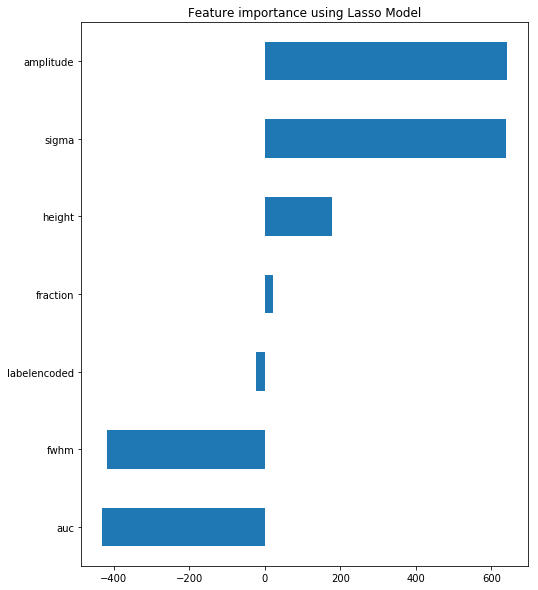

In [33]:
#LASSO 
#feature selection

# X_train_scaled  = preprocessing.normalize(X_train, norm='l2', axis=0, copy=True, return_norm=False)
# X_test_scaled  = preprocessing.normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
# If normalized is needed
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Lasso(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# What makes sense is that center should be the only one to correlate to labels due to peakidentification
# L1 loss function points to center as the only solution

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  import sys
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


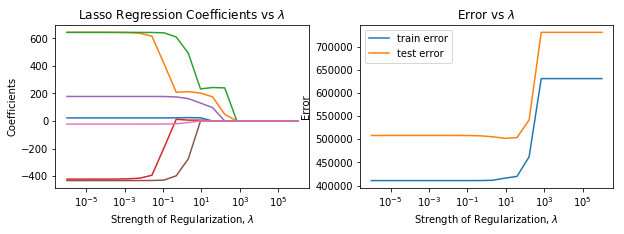

In [34]:
model=linear_model.Lasso()
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,20) # SEACH THE RANGE OF THE LAMBDA SPACE

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
plt.figure(figsize=(10,3))
plt.locator_params(nbins=5)
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Error')
plt.legend(loc=0)
plt.title('Error vs $\lambda$')
plt.savefig('Lasso_feature_selection', dpi=300, bbox_inches='tight')

# Ridge Feature Selection #Didnt eliminate anything 

fraction         22.465358
sigma           110.827641
amplitude       641.432578
fwhm            110.827641
height          177.861509
auc            -430.890612
labelencoded    -22.363190
dtype: float64
Lasso picked 7 variables and eliminated the other 0 variables


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  """


Text(0.5, 1.0, 'Feature importance using Ridge Model')

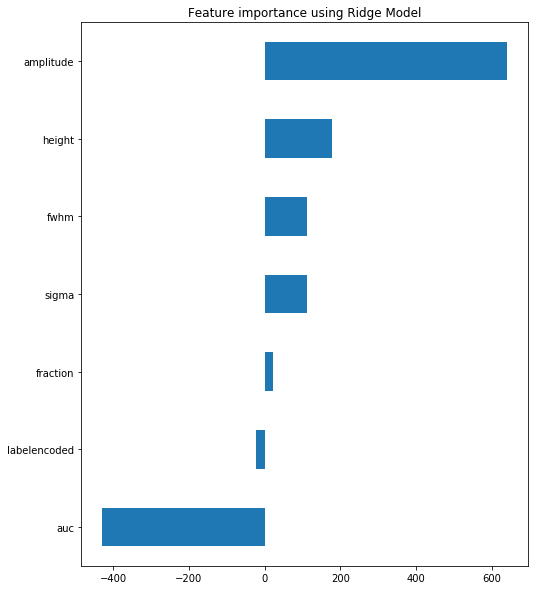

In [35]:
#Ridge
#feature selection
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
clf = linear_model.Ridge(alpha=0.004, tol=0.0001 ,max_iter=50000)
clf.fit(X_train_normalized,y_train)
coef = pd.Series(clf.coef_, index = X_train.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

## 2-2 Example of searching the $\alpha$ space in RR RIDGE

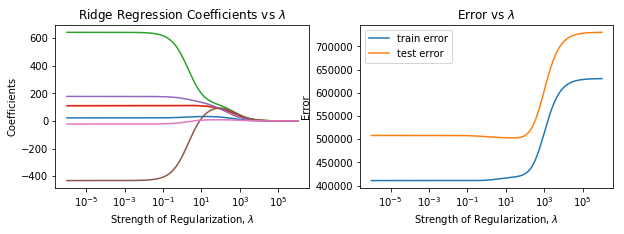

In [36]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,200) # SEACH THE RANGE OF THE LAMBDA SPACE
model=Ridge()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    model.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
# what is being plotted here? 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('Strength of Regularization, $\lambda$')
plt.ylabel('Error')
plt.legend(loc=0)
plt.title('Error vs $\lambda$')
plt.savefig('Ridge_feature_selection', dpi=300, bbox_inches='tight')

# Neural network

In [37]:
inputs=['fraction','sigma','amplitude','height', 'auc','labelencoded']
yinputs = ['center','fwhm']
amt = len(cal)
X=cal[inputs][:amt]
y = cal[yinputs][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat[yinputs]#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [38]:
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statistics
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

In [39]:
import sys
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  


In [40]:

mlpr =MLPRegressor(solver='lbfgs', alpha=1e-5, batch_size=10000,verbose=0, max_iter=200, validation_fraction=0.33,
                    hidden_layer_sizes=(5, 2), random_state=1)
mlpr.fit(X_train, y_train)

mlpr.predict(X_test)

print("Training set score: %f" % mlpr.score(X_train, y_train))
print("Test set score: %f" % mlpr.score(X_test, y_test))

# instantiate the model with the best known parameters
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)





from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# train the model with X and y (not X_train and y_train)
mlpr.fit(X_exp_normalized, y_exp)
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

# Pick hyper parameters change how fast your neaural network learns
# change the conversion of the network settings and its accuracy settings 
# The epochs limit  can be changed into a conditiional function where 
# This is sayting just run  150 epochs and stop
# THe neaural network can be inputed with certain data points for each epoch
# The history object returned by the fit call contains the information in a fitting run.

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  del sys.path[0]


Training set score: 0.779615
Test set score: 0.828383
(787, 2)
(787, 6)


Iteration 1, loss = 592082.46384623
Iteration 2, loss = 565195.05151589
Iteration 3, loss = 334169474.19649893
Iteration 4, loss = 637942.76832068
Iteration 5, loss = 388342053881019.25000000
Iteration 6, loss = 2985752680326489.50000000
Iteration 7, loss = 11537599995956602863616.00000000
Iteration 8, loss = 23471834558126675197952.00000000
Iteration 9, loss = 37798350203406845476864.00000000
Iteration 10, loss = 53596637246071941103616.00000000
Iteration 11, loss = 70167678128734947246080.00000000
Iteration 12, loss = 86987206724022299525120.00000000
Iteration 13, loss = 103668311754447907717120.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: -42722.237532
Test set score: -36956.390761


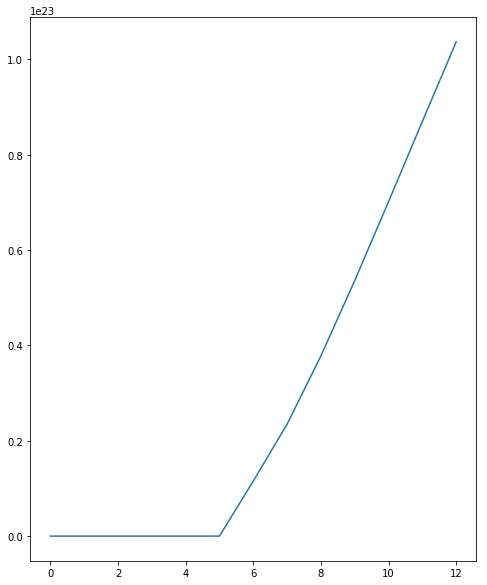

Iteration 1, loss = 1247095695.16127634
Iteration 2, loss = 172424846625405406797424023151050752.00000000
Iteration 3, loss = 1224131735684875914928303156450295808.00000000
Iteration 4, loss = 2510159376525371001222776693926658048.00000000
Iteration 5, loss = 3614927340730276518446857177683460096.00000000
Iteration 6, loss = 4452119747983305941598834617944637440.00000000
Iteration 7, loss = 5049766413219224150087900356627398656.00000000
Iteration 8, loss = 5462701769564954228126980770092810240.00000000
Iteration 9, loss = 5742590666912959226689266232776982528.00000000
Iteration 10, loss = 5930083573744608704687441594852311040.00000000
Iteration 11, loss = 6054758276657300931730246332158312448.00000000
Iteration 12, loss = 6137272135770921334561602240262438912.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
(787, 2)
(787, 6)
Experimental Error Rate: center    0.0
fwhm      0.0
dtype: float64


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [41]:
mlpr = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1)

mlpr.fit(X_train, y_train)

mlpr.predict(X_test)

print("Training set score: %f" % mlpr.score(X_train, y_train))
print("Test set score: %f" % mlpr.score(X_test, y_test))
loss_values = mlpr.loss_curve_
# print (loss_values)
plt.plot(loss_values)
plt.show()
# instantiate the model with the best known parameters
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)


from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# train the model with X and y (not X_train and y_train)
mlpr.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = mlpr.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 592868.63458537
Iteration 2, loss = 442715.87110201
Iteration 3, loss = 301661.71295307
Iteration 4, loss = 204761.04506983
Iteration 5, loss = 162183.41073863
Iteration 6, loss = 163142.81782370
Iteration 7, loss = 186584.95494014
Iteration 8, loss = 211873.57416281
Iteration 9, loss = 225703.31033533
Iteration 10, loss = 224094.11105768
Training set score: -0.328746
Test set score: -0.266783


Text(0, 0.5, 'Loss Cost')

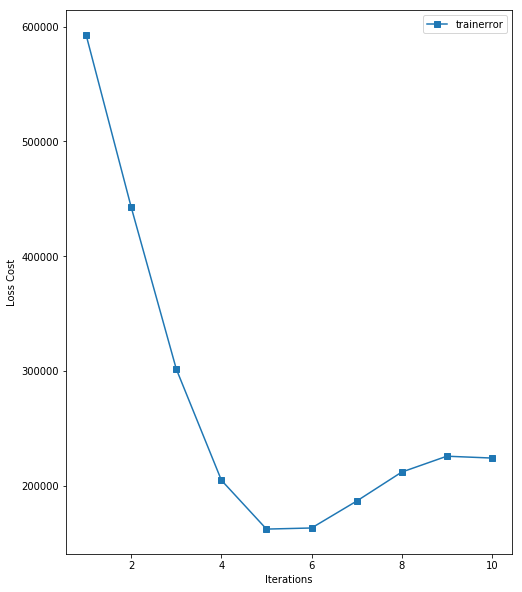

In [42]:
num = 10
mlpr = MLPRegressor(hidden_layer_sizes=(5,2), max_iter=num, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlpr.fit(X_train, y_train)

ypred = mlpr.predict(X_test)

print("Training set score: %f" % mlpr.score(X_train, y_train))
print("Test set score: %f" % mlpr.score(X_test, y_test))
loss_values = mlpr.loss_curve_
# print (loss_values)
# plt.plot(loss_values)
# plt.show()
lossrange = np.arange(1,num+1,1)
plt.plot(lossrange,loss_values,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss Cost')



C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Training set score: -21985.481440
Test set score: -19019.595633


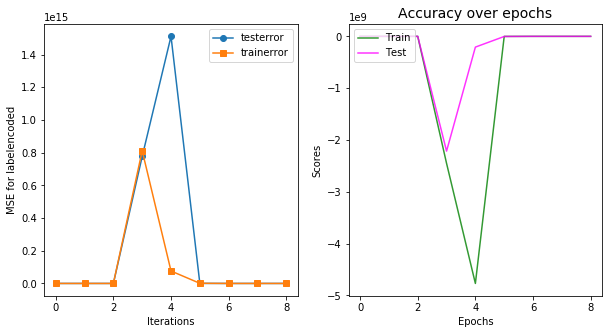

In [43]:
coefs = []
trainerror = []
testerror = []
loss_values = []
scores_train = []
scores_test = []
num = 10
lossrange = np.arange(1,num,1)
for i in lossrange:
    mlpr = MLPRegressor(solver='sgd',hidden_layer_sizes=(100,100), random_state=1, max_iter=i, warm_start=True)
    mlpr.fit(X_train,y_train)
    trainpred = mlpr.predict(X_train)
    testpred = mlpr.predict(X_test)
    coefs.append(mlpr.coefs_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))
    loss_values.append(mlpr.loss_curve_)
    # SCORE TRAIN
    scores_train.append(mlpr.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(mlpr.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(trainerror,marker='o',label='testerror')
plt.plot(testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE for labelencoded')
plt.subplot(122)
print("Training set score: %f" % mlpr.score(X_train, y_train))
print("Test set score: %f" % mlpr.score(X_test, y_test))
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend(loc='upper left')
plt.show()

### Accuracy over epochs data

# Cross Validation of NN

In [44]:
# Cross Validation
inputs=['fraction','sigma','amplitude','height', 'auc','labelencoded']
yinputs = ['center','fwhm']
amt = len(cal)
X=cal[inputs][:amt]
y = cal[yinputs][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat[yinputs]#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)


# Kfold
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=5)
X = np.array(X)
y = np.array(y)
for train_index, test_index in kf.split(X):
    print('Train: %s | test: %s' % (train_index, test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('X_test: ', X_test)    

Train: [ 38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188] | test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
X_test:  [[0.7183274673384545 4.380337829195924 3.2415220140280736
  0.2671145389093179 3.209203120986047 7]
 [0.5594965905780308 4.4658648590683425 8.22711448927372
  0.7092664460016654 8.205188796289036 7]
 [0.9999913699057317 4.095155587787694 1.74873

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
seed = 21899

In [46]:
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(max_iter=1)
# #Define a hyper-parameter space to search. (All the values that you want to try out.)

# parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# # Note: the max_iter=100 that you defined on the initializer is not in the grid. So, that number will be constant, while the ones in the grid will be searched.

# # Run the search:

# from sklearn.model_selection import GridSearchCV

# clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3)
# clf.fit(X_train, y_train)
# # Note: the parameter n_jobs is to define how many CPU cores from your computer to use. The cv is the number of splits for cross-validation.

# # See the best results:

# # Best paramete set
# print('Best parameters found:\n', clf.best_params_)

# # All results
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# # Now you can use the clf to make new predictions. For example, check the performance on your test set.

# y_true, y_pred = y_test , clf.predict(X_test)

# from sklearn.metrics import classification_report
# print('Results on the test set:')
# print(classification_report(y_true, y_pred))










In [47]:
[coef.shape for coef in mlpr.coefs_]

[(6, 100), (100, 100), (100, 2)]

Iteration 1, loss = 606679.22351529
Iteration 2, loss = 59265825.33737968
Iteration 3, loss = 5477243139.57078171
Iteration 4, loss = 11142458232.28921700
Iteration 5, loss = 17943110250.35050583
Iteration 6, loss = 25442157832.80006790
Iteration 7, loss = 33307815916.64282990
Iteration 8, loss = 41291317475.68630219
Iteration 9, loss = 49209105904.77343750
Iteration 10, loss = 56928614871.85417175
Training set score: -0.278541
Test set score: -0.302052
Iteration 1, loss = 382905.73446714
Iteration 2, loss = 201434.38058310
Iteration 3, loss = 228889.09970942
Iteration 4, loss = 184842.31492527
Iteration 5, loss = 184047.85098577
Iteration 6, loss = 182173.92999314
Iteration 7, loss = 179500.35107241
Iteration 8, loss = 180199.85609932
Iteration 9, loss = 179558.94335151
Iteration 10, loss = 179408.63240934
(787, 2)
(787, 6)
Experimental Error Rate: center    0.0
fwhm      0.0
dtype: float64


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


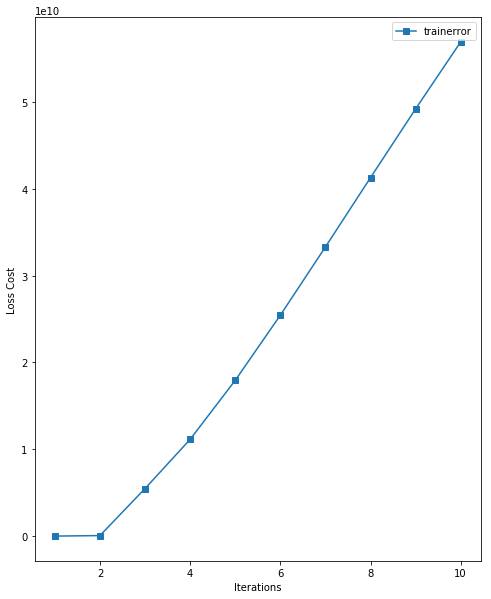

In [48]:
num = 10
# instantiate the model with the best known parameters
mlpr =MLPRegressor(hidden_layer_sizes=(5,2), max_iter=num, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlpr.fit(X_train, y_train)

ypred = mlpr.predict(X_test)

print("Training set score: %f" % mlpr.score(X_train, y_train))
print("Test set score: %f" % mlpr.score(X_test, y_test))
loss_values = mlpr.loss_curve_
# print (loss_values)
# plt.plot(loss_values)
# plt.show()
lossrange = np.arange(1,num+1,1)
plt.plot(lossrange,loss_values,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss Cost')

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# Scale and Normalize
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
mlpr.fit(X_exp_normalized, y_exp)
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

# make a prediction for an out-of-sample observation
ypred = mlpr.predict(X_exp_normalized) 
rate = mlpr.predict(X_exp_normalized)  == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES





# Support Vector Machines rbf

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

In [50]:
inputs=['labelencoded']
amt = len(cal)
X=cal[inputs][:amt]
y = cal['center'][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat['center']#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [51]:
X_train_scaled  = preprocessing.normalize(X_train, norm='l2', axis=0, copy=True, return_norm=False)
X_test_scaled  = preprocessing.normalize(X_test, norm='l2', axis=0, copy=True, return_norm=False)
#Support Vector Machine 
#-->Chosen under the assumption that eventually more batteries will be added with highly dimensional features that 
# can not be seperated by simple linear or logistic regression models 

In [52]:
from sklearn.svm import SVR  
svr = SVR(kernel='sigmoid',gamma ='scale')
svr.fit(X_train, y_train) 
trainpred=svr.predict(X_train_scaled ) #predict train data 
testpred=svr.predict(X_test_scaled )
print("Train error",mean_squared_error(y_train,trainpred))
print("Test error",mean_squared_error(y_test,testpred))
print("Training set score: %f" % svr.score(X_train, y_train))
print("Test set score: %f" % svr.score(X_test, y_test))
y_pred = svr.predict(X_test)  


Train error 673479.3747793264
Test error 779647.6930116315
Training set score: -0.074520
Test set score: -0.073829


In [54]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
svr = SVR(kernel='rbf',gamma ='scale')
scaler = StandardScaler().fit(X_exp)
X_exp_scaled  = preprocessing.normalize(X_exp, norm='l2', axis=0, copy=True, return_norm=False)
svr.fit(X_exp_scaled,y_exp)


# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate =svr.predict(X_exp_scaled)== y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

(787,)
(787, 6)
Experimental Error Rate: 0.0


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


# KNN

In [55]:
inputs=['fraction','sigma','amplitude','height', 'auc','labelencoded']
yinputs = ['center','fwhm']
amt = len(cal)
X=cal[inputs][:amt]
y = cal[yinputs][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat[yinputs]#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [56]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [57]:
n_neighbors = 5
weights = 'uniform'
KNNmodel = neighbors.KNeighborsRegressor(n_neighbors, weights=weights) # initialize the model by choosing the number of neighbors (flexibility of model in this case)
# KNNmodel = KNeighborsClassifier(n_neighbors=1) minimum neighbord minimum predicted error
# remember the parabolic function of training vs. test set there is limit to the flexilibility vs. errors of the model
# Expected n_neighbors <= n_samples,  but n_samples = 15, n_neighbors = 20
# thus KNNmodel = KNeighborsClassifier(n_neighbors=15) is max

In [58]:
KNNmodel.fit(X_train, y_train) # feed the model some training data

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [59]:
rate = KNNmodel.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = KNNmodel.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: center    0.046358
fwhm      0.000000
dtype: float64
Testing Error Rate: center    0.0
fwhm      0.0
dtype: float64


In [60]:
k_range = range(1,20)
# empty list to store scores
k_scores = []
trainerror = []
testerror = []
train_rmse_val = []
test_rmse_val = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    KNNmodel = neighbors.KNeighborsRegressor(n_neighbors=k, weights=weights)
    KNNmodel.fit(X_train, y_train)
    trainerror.append(mean_squared_error(y_train,KNNmodel.predict(X_train)))
    testerror.append(mean_squared_error(y_test,KNNmodel.predict(X_test)))
    train_rmse_val.append(np.sqrt(mean_squared_error(y_train,KNNmodel.predict(X_train)))) #store rmse values
#     print('Train RMSE value for k= ' , k , 'is:', trainerror)
    test_rmse_val.append(np.sqrt(mean_squared_error(y_train,KNNmodel.predict(X_train)))) #store rmse values
#     print('Test RMSE value for k= ' , k , 'is:', testerror)
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_



C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 3}

Text(0, 0.5, 'MSE for $labelencoded$')

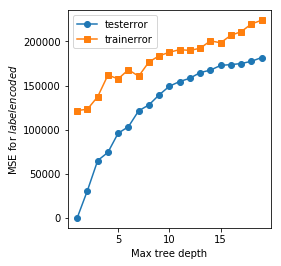

In [61]:
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(k_range,trainerror,marker='o',label='testerror')
plt.plot(k_range,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')

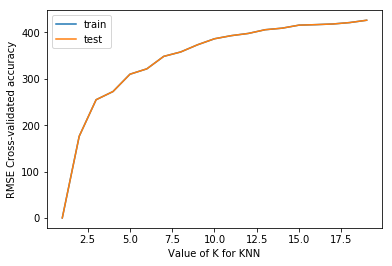

In [62]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, train_rmse_val,label='train')
plt.plot(k_range, test_rmse_val,label='test')
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE Cross-validated accuracy')
plt.legend()

In [63]:
# instantiate the model with the best known parameters
KNNmodel = neighbors.KNeighborsRegressor(n_neighbors = 3, weights=weights)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
KNNmodel.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = KNNmodel.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

(787, 2)
(787, 6)
Experimental Error Rate: center    0.340534
fwhm      0.000000
dtype: float64


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Decision Trees # specifically to see if below descriptors can find and predict Area under curve # Strings needed to be 

In [67]:
inputs=['fraction','sigma','amplitude','height', 'auc','labelencoded']
yinputs = ['center','fwhm']
amt = len(cal)
X=cal[inputs][:amt]
y = cal[yinputs][:amt]
X_exp= dat[inputs]#datformic[inputs]
y_exp= dat[yinputs]#datformic['labelencoded']
np.random.seed(222)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1000)

In [68]:
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [69]:
DT=tree.DecisionTreeRegressor(max_depth=3)
DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [70]:
import os
#conda install -c conda-forge pydotplus=2.0.2
# http://www.webgraphviz.com
import pydotplus 

In [71]:
with open("basic_tree.dot", 'w') as f:
    f = tree.export_graphviz(DT, out_file=f)

In [72]:
#http://www.webgraphviz.com
# os.unlink('basic_tree.dot')

dot_data = tree.export_graphviz(DT, out_file=None,feature_names=inputs)
graph = pydotplus.graph_from_dot_data(dot_data) 
#graph.write_pdf("basic_tree.pdf") 

In [73]:
os.environ["PATH"] += os.pathsep + 'C:/Users/koolk/Anaconda3/Library/bin/graphviz/'

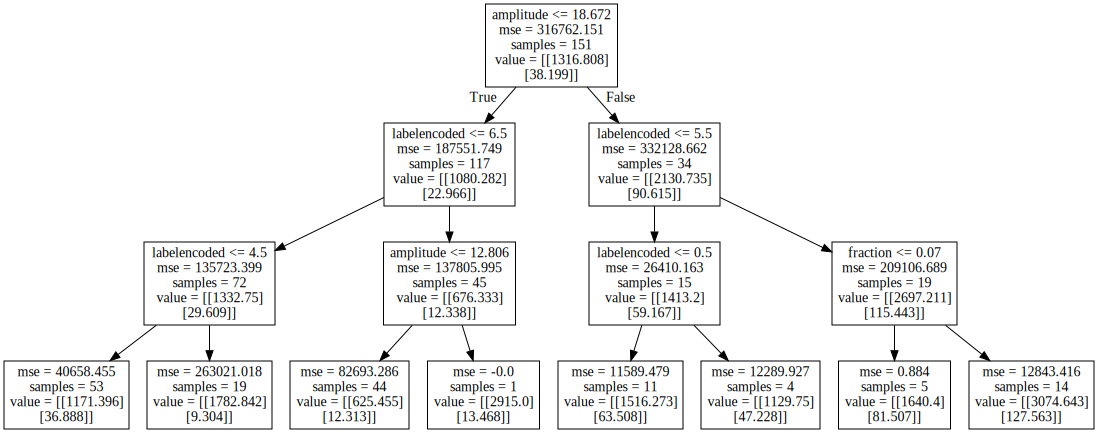

In [74]:
from IPython.display import SVG, display
display(SVG(graph.create_svg()))

In [75]:
model.fit(X_train,y_train)
rate = DT.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = DT.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: center    0.006623
fwhm      0.006623
dtype: float64
Testing Error Rate: center    0.026316
fwhm      0.000000
dtype: float64


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


3074.6428571428573
Train error 73822.90237920209
Test error 71747.96681256685


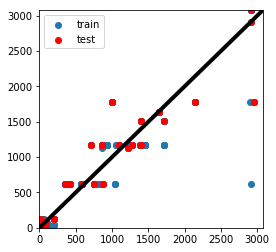

In [76]:
# make predictions on test and train set 
trainpred=DT.predict(X_train)
testpred=DT.predict(X_test)


maxlimit =testpred.max()
print(maxlimit)
#parity plot 
plt.figure(figsize=(4,4))
plt.xlim([0,maxlimit]);
plt.ylim([0,maxlimit]);
plt.scatter(y_train,trainpred, label ='train')
plt.scatter(y_test,testpred,color='r', label = 'test')
plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
plt.legend()
#calculate the test and train error
print("Train error",mean_squared_error(y_train,trainpred))
print("Test error",mean_squared_error(y_test,testpred))

In [77]:
trainerror = []
testerror = []

trees = np.arange(1,20,1)
#model=tree.DecisionTreeRegressor()

# loop over lambda values (strength of regularization)
for t in trees:
    model=tree.DecisionTreeRegressor(max_depth=t)
    model.fit(X_train,y_train)
    trainerror.append(mean_squared_error(y_train,model.predict(X_train)))
    testerror.append(mean_squared_error(y_test,model.predict(X_test)))

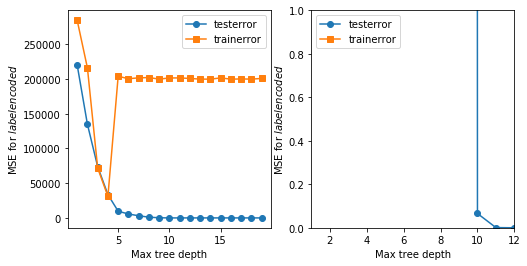

In [78]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')
plt.subplot(122)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.ylim((0,1))
plt.xlim((1,12))
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $labelencoded$')
plt.savefig('DT_MSE', dpi=300, bbox_inches='tight')

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13]}

DTC = tree.DecisionTreeRegressor()

model = GridSearchCV(DTC, params, cv=4)
model.fit(X_train,y_train)
model.best_params_

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 8}

In [80]:
# instantiate the model with the best known parameters
DT=tree.DecisionTreeRegressor(max_depth=8)
scaler = StandardScaler().fit(X_exp)
X_exp_normalized = pd.DataFrame(data=scaler.transform(X_exp), columns=X_exp.columns)
# train the model with X and y (not X_train and y_train)
DT.fit(X_exp_normalized, y_exp)

# make a prediction for an out-of-sample observation
# print the shapes of the new y objects
print(y_exp.shape)
print(X_exp_normalized.shape)

rate = DT.predict(X_exp_normalized) == y_exp # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Experimental Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES


(787, 2)
(787, 6)
Experimental Error Rate: center    0.210928
fwhm      0.078780
dtype: float64


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### 